In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, AveragePooling2D, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps

<ipython-input-48-4d9bcecf6eae>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


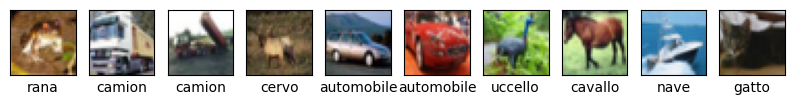

In [48]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Classi presenti in CIFAR-10
class_names = ['aereo', 'automobile', 'uccello', 'gatto', 'cervo',
               'cane', 'rana', 'cavallo', 'nave', 'camion']

# Visualizzazione di alcune immagini
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

In [49]:
import tensorflow as tf

X_train = tf.image.rgb_to_grayscale(X_train).numpy()
X_test = tf.image.rgb_to_grayscale(X_test).numpy()

# Normalizza a float32 tra 0 e 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [50]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,1)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
history = model.fit(X_train, y_train,
                    epochs=15, batch_size=64,
                    validation_split=0.2, verbose=1)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 198s 315ms/step - accuracy: 0.3838 - loss: 1.7172 - val_accuracy: 0.4967 - val_loss: 1.5042
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 195s 305ms/step - accuracy: 0.5595 - loss: 1.2588 - val_accuracy: 0.5632 - val_loss: 1.2388
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 308ms/step - accuracy: 0.6227 - loss: 1.0847 - val_accuracy: 0.6635 - val_loss: 0.9722
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 307ms/step - accuracy: 0.6653 - loss: 0.9794 - val_accuracy: 0.6705 - val_loss: 0.9918
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 305ms/step - accuracy: 0.7012 - loss: 0.8730 - val_accuracy: 0.7180 - val_loss: 0.8201
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 303ms/step - accuracy: 0.7220 - loss: 0.8066 - val_accuracy: 0.7292 - val_loss: 0.7978
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 304ms/step - accuracy: 0.7354 - loss: 0.7573 - val_accuracy: 0.7357 - val_loss: 0.7657
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 308ms/step - accuracy: 0.7571 -

In [56]:
from google.colab import output, files
model.save_weights("pesi_rete_immagini.weights.h5")
files.download("pesi_rete_immagini.weights.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy on the test set: 0.7782
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step


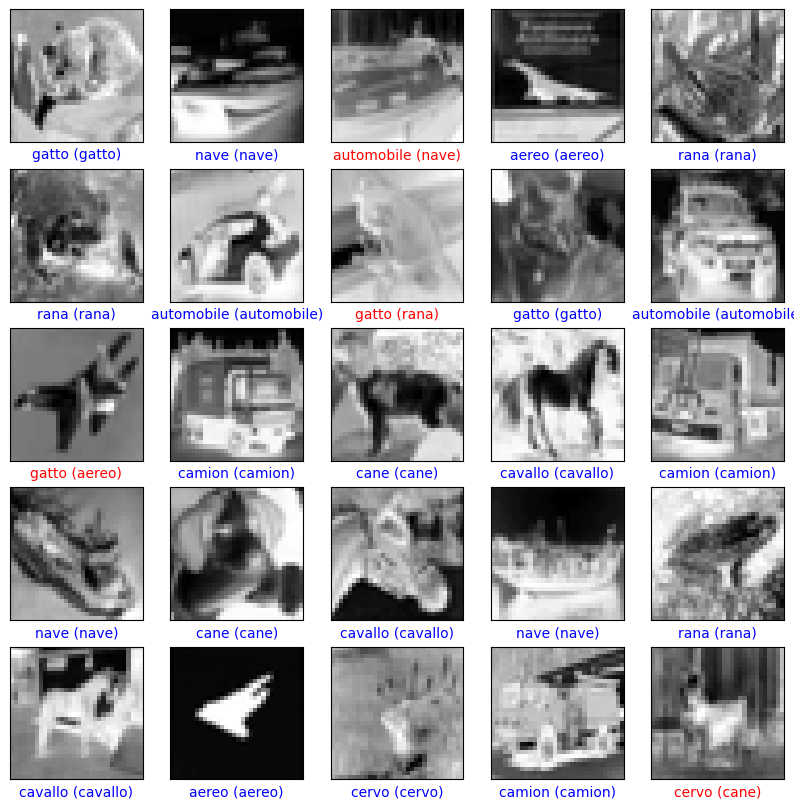

In [53]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy on the test set: {accuracy:.4f}')

predictions = model.predict(X_test)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(32, 32), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i][0]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'{class_names[predicted_label]} ({class_names[true_label]})', color=color)
plt.show()